In [4]:
import sklearn
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

label_names = data['target_names']
labels = data['target']
feature_names = data['feature_names']
features = data['data']

print(label_names)

['malignant' 'benign']


In [5]:
print(labels[0])

0


In [7]:
print(feature_names[0])

mean radius


In [9]:
print(features[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [13]:
from sklearn.model_selection import train_test_split

train, test, train_labels, test_labels = train_test_split(features,labels,test_size = 0.40, random_state = 42)

In [17]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
model = gnb.fit(train, train_labels)

In [19]:
preds = gnb.predict(test)
print(preds)

[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 0 0 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0
 0 1 1 0 1 0 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 0 0 1 1 0 1]


In [21]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_labels,preds))

0.9517543859649122


Text(0.5, 1.0, 'SVC with linear kernel')

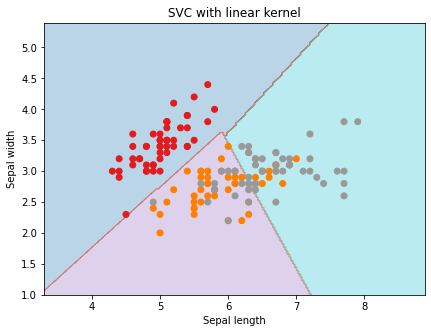

In [39]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt

iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
np.arange(y_min, y_max, h))
X_plot = np.c_[xx.ravel(), yy.ravel()]

C = 1.0

svc_classifier = svm.SVC(kernel='linear', C=C, decision_function_shape = 'ovr').fit(X, y)
Z = svc_classifier.predict(X_plot)
Z = Z.reshape(xx.shape)
plt.figure(figsize = (15, 5))
plt.subplot(121)
plt.contourf(xx, yy, Z, cmap = plt.cm.tab10, alpha = 0.3)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')

d:\anaconda\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


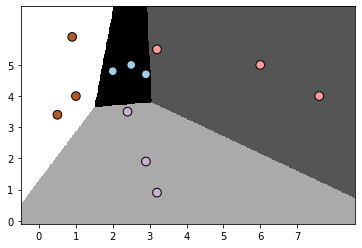

In [45]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

X = np.array([[2, 4.8], [2.9, 4.7], [2.5, 5], [3.2, 5.5], [6, 5], [7.6, 4],
              [3.2, 0.9], [2.9, 1.9],[2.4, 3.5], [0.5, 3.4], [1, 4], [0.9, 5.9]])
y = np.array([0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3])

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75)

Classifier_LR.fit(X, y)


min_x, max_x = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
min_y, max_y = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0

    
mesh_step_size = 0.02

x_vals, y_vals = np.meshgrid(np.arange(min_x, max_x, mesh_step_size),
                 np.arange(min_y, max_y, mesh_step_size))

output = Classifier_LR.predict(np.c_[x_vals.ravel(), y_vals.ravel()])
output = output.reshape(x_vals.shape)
plt.figure()
plt.pcolormesh(x_vals, y_vals, output, cmap = plt.cm.gray)

plt.scatter(X[:, 0], X[:, 1], c = y, s = 75, edgecolors = 'black',
linewidth=1, cmap = plt.cm.Paired)

plt.xlim(x_vals.min(), x_vals.max())
plt.ylim(y_vals.min(), y_vals.max())
plt.xticks((np.arange(int(X[:, 0].min() - 1), int(X[:, 0].max() + 1), 1.0)))
plt.yticks((np.arange(int(X[:, 1].min() - 1), int(X[:, 1].max() + 1), 1.0)))
plt.show()